In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H1.csv', dtype=dtypes)
a=train_df.head()
b=train_df
b

data=b.apply(lambda col: pd.factorize(col, sort=True)[0])
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,80,0,5,30,30,2,4,2,0,...,0,43,0,0,2,2722,1,1,1,143
1,0,76,0,11,38,22,2,7,2,0,...,0,141,0,0,0,826,0,0,1,200
2,1,81,2,8,19,16,0,4,2,2,...,0,43,0,0,2,2044,0,2,0,757
3,0,37,1,7,12,23,1,3,1,0,...,0,44,0,0,2,697,0,2,1,378
4,0,57,2,4,2,16,2,5,2,0,...,0,43,0,0,2,281,0,1,1,680
5,1,187,1,5,31,30,2,5,2,0,...,0,74,0,0,2,2457,0,0,0,318
6,0,1,1,3,7,16,0,2,1,0,...,0,0,40,0,2,370,1,0,1,340
7,0,142,2,1,33,25,2,5,2,0,...,0,151,0,0,2,2711,0,0,1,901
8,1,65,1,10,40,3,0,1,2,0,...,0,43,0,0,2,1226,0,0,0,520
9,1,119,1,8,19,12,2,2,2,0,...,0,43,0,0,2,1424,0,2,0,308


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
IsCanceled = data['IsCanceled']
y = IsCanceled

In [5]:
leadtime = data['LeadTime'] #1
staysweekendnights = data['StaysInWeekendNights'] #2
staysweeknights = data['StaysInWeekNights'] #3
adults = data['Adults'] #4
children = data['Children'] #5
babies = data['Babies'] #6
meal = data['Meal'] #7
country = data['Country'] #8
marketsegment = data['MarketSegment'] #9
distributionchannel = data['DistributionChannel'] #10
isrepeatedguest = data['IsRepeatedGuest'] #11
previouscancellations = data['PreviousCancellations'] #12
previousbookingsnotcanceled = data['PreviousBookingsNotCanceled'] #13
reservedroomtype = data['ReservedRoomType'] #14
assignedroomtype = data['AssignedRoomType'] #15
bookingchanges = data['BookingChanges'] #16
deptype = data['DepositType'] #17
agent = data['Agent'] #18
company = data['Company'] #19
dayswaitinglist = data['DaysInWaitingList'] #20
custype = data['CustomerType'] #21
adr = data['ADR'] #22
rcps = data['RequiredCarParkingSpaces'] #23
totalsqr = data['TotalOfSpecialRequests'] #24
reserv = data['ReservationStatus'] #25

In [6]:
x = np.column_stack((leadtime,staysweekendnights,staysweeknights,adults,children,babies,meal,country,marketsegment,distributionchannel,isrepeatedguest,previouscancellations,previousbookingsnotcanceled,reservedroomtype,assignedroomtype,bookingchanges,deptype,agent,company,dayswaitinglist,custype,adr,rcps,totalsqr,reserv))
x = sm.add_constant(x, prepend=True)
y=y.values

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.00000000e+00 2.64547601e-02 3.76477525e-03 1.02176989e-02
 2.03326905e-03 4.70831050e-03 2.94376622e-04 2.50857973e-03
 5.85259965e-02 1.48634627e-02 7.68438817e-03 5.50781494e-03
 8.19894673e-03 6.67289269e-04 2.34311227e-03 4.33907043e-03
 3.37021921e-03 4.23563715e-02 8.46898382e-03 1.69590164e-03
 2.77019676e-04 9.73881159e-03 9.06862237e-03 3.56449786e-02
 5.91657374e-03 7.31350667e-01]


/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
y1 = y
x1 = np.column_stack((leadtime,country,custype,deptype,reserv))
x1 = sm.add_constant(x1, prepend=True)

In [9]:
type(country)

pandas.core.series.Series

In [10]:
y1

array([0, 0, 1, ..., 1, 0, 0])

In [11]:
x1

array([[  1.,  80.,  10.,   2.,   0.,   1.],
       [  1.,  76.,  81.,   0.,   0.,   1.],
       [  1.,  81.,  39.,   2.,   0.,   0.],
       ...,
       [  1.,  98.,  83.,   2.,   0.,   0.],
       [  1., 139.,  83.,   2.,   0.,   1.],
       [  1.,  46.,  83.,   2.,   0.,   1.]])

In [12]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=0)

logreg = LogisticRegression().fit(x1_train,y1_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(x1_train,y1_train)))
print("Test set score: {:.3f}".format(logreg.score(x1_test,y1_test)))

Training set score: 0.987
Test set score: 0.987


/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.157922
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19994
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Jun 2019   Pseudo R-squ.:                  0.7722
Time:                        14:22:55   Log-Likelihood:                -3158.4
converged:                       True   LL-Null:                       -13863.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3173      0.173     13.402      0.000       1.978       2.656
x1             0.0017      0.

In [14]:
pr = logreg.predict(x1_test)
pr

array([1, 1, 1, ..., 1, 1, 0])

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y1_test,pr))
print(classification_report(y1_test,pr))

[[2531    0]
 [  65 2404]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2531
           1       1.00      0.97      0.99      2469

   micro avg       0.99      0.99      0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [16]:
custype #significant
leadtime #significant
deptype #significant
country #significant
# rcps #insignificant
reserv #significant

0        1
1        1
2        0
3        1
4        1
5        0
6        1
7        1
8        0
9        0
10       0
11       0
12       1
13       0
14       1
15       0
16       1
17       0
18       1
19       0
20       1
21       1
22       1
23       1
24       0
25       0
26       1
27       1
28       1
29       0
        ..
19970    0
19971    1
19972    1
19973    1
19974    0
19975    0
19976    0
19977    0
19978    0
19979    1
19980    0
19981    0
19982    1
19983    0
19984    0
19985    1
19986    1
19987    1
19988    0
19989    0
19990    0
19991    1
19992    1
19993    1
19994    1
19995    0
19996    0
19997    0
19998    1
19999    1
Name: ReservationStatus, Length: 20000, dtype: int64

In [17]:
pr = logreg.predict(x1_test)
pr

array([1, 1, 1, ..., 1, 1, 0])

In [18]:
x1_test

array([[  1., 275.,  83.,   2.,   1.,   0.],
       [  1., 129.,  39.,   2.,   0.,   0.],
       [  1., 272.,  36.,   2.,   0.,   0.],
       ...,
       [  1., 136.,  83.,   2.,   0.,   0.],
       [  1., 162.,  83.,   2.,   0.,   0.],
       [  1.,   0.,  83.,   2.,   0.,   1.]])

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y1_test,logreg.decision_function(x1_test))

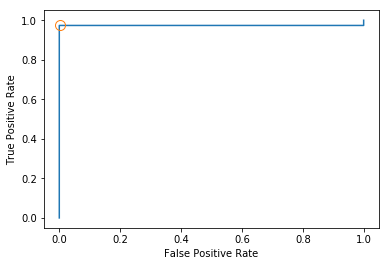

In [20]:
plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [21]:
h2data = pd.read_csv('H2.csv', dtype=dtypes)
a=h2data.head()
b=h2data
b

seconddata=b.apply(lambda col: pd.factorize(col, sort=True)[0])
seconddata

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,1,73,2,0,13,2,1,1,2,0,...,0,155,0,0,2,753,0,0,0,621
1,0,9,2,7,11,22,1,3,2,0,...,0,141,0,0,2,1784,0,1,1,653
2,0,39,0,1,32,9,1,1,2,0,...,0,1,0,0,3,122,0,0,1,62
3,0,4,2,3,6,16,1,2,2,0,...,0,73,0,0,0,192,0,0,1,618
4,1,222,1,5,27,5,1,4,2,0,...,0,155,0,0,0,606,0,1,0,184
5,1,30,0,11,39,29,0,2,2,0,...,1,83,0,0,2,1155,0,0,0,96
6,0,6,0,1,34,22,1,0,2,0,...,0,155,0,0,0,407,0,0,1,74
7,0,6,0,2,49,9,0,2,2,0,...,0,136,0,0,3,0,0,1,1,182
8,1,230,1,11,36,5,0,5,2,0,...,0,116,0,0,3,1376,0,0,0,277
9,0,65,0,10,40,7,0,3,2,0,...,0,70,0,0,2,260,0,0,1,121


In [22]:
type(seconddata)

pandas.core.frame.DataFrame

In [23]:
export_csv = seconddata.to_csv (r'/media/veracrypt9/a_documents/group b/projects/2 hotel project/dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [24]:
leadtime = seconddata['LeadTime'] #1
staysweekendnights = seconddata['StaysInWeekendNights'] #2
staysweeknights = seconddata['StaysInWeekNights'] #3
adults = seconddata['Adults'] #4
children = seconddata['Children'] #5
babies = seconddata['Babies'] #6
meal = seconddata['Meal'] #7
country = seconddata['Country'] #8
marketsegment = seconddata['MarketSegment'] #9
distributionchannel = seconddata['DistributionChannel'] #10
isrepeatedguest = seconddata['IsRepeatedGuest'] #11
previouscancellations = seconddata['PreviousCancellations'] #12
previousbookingsnotcanceled = seconddata['PreviousBookingsNotCanceled'] #13
reservedroomtype = seconddata['ReservedRoomType'] #14
assignedroomtype = seconddata['AssignedRoomType'] #15
bookingchanges = seconddata['BookingChanges'] #16
deptype = seconddata['DepositType'] #17
agent = seconddata['Agent'] #18
company = seconddata['Company'] #19
dayswaitinglist = seconddata['DaysInWaitingList'] #20
custype = seconddata['CustomerType'] #21
adr = seconddata['ADR'] #22
rcps = seconddata['RequiredCarParkingSpaces'] #23
totalsqr = seconddata['TotalOfSpecialRequests'] #24
reserv = seconddata['ReservationStatus'] #25

In [25]:
a = np.column_stack((leadtime,country,custype,deptype,reserv))
a = sm.add_constant(a, prepend=True)
IsCanceled = seconddata['IsCanceled']
b = IsCanceled
b=b.values

In [26]:
prh2 = logreg.predict(a)
prh2

array([1, 0, 0, ..., 0, 0, 1])

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(b,prh2))
print(classification_report(b,prh2))

[[7004    0]
 [ 137 4859]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7004
           1       1.00      0.97      0.99      4996

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



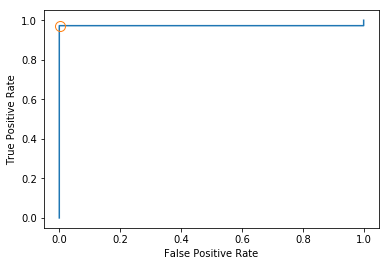

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(b,logreg.decision_function(a))
plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [29]:
# Odds of not cancelling for random H2 customer (customer did not cancel)
# leadtime,country,custype,deptype,reserv
sum1=2.3173+(0.0017*0)+(0.0192*93)-(0.1166*2)+(1.1915*0)-(6.2776*1)
odds=np.exp(sum1)
odds
probability1=odds/(1+odds)
probability1

0.08257226231530848

In [30]:
# Odds of cancelling for random H2 customer (customer did cancel)
# leadtime,country,custype,deptype,reserv
sum2=2.3173+(0.0017*179)+(0.0192*84)-(0.1166*2)+(1.1915*1)-(6.2776*0)
odds=np.exp(sum2)
odds
probability2=odds/(1+odds)
probability2

0.9944737267167475